<a href="https://colab.research.google.com/github/DarioMameli/DL_Assignments/blob/main/DL_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Assignment 2
## Group 4
**AUTHORS**:
*   Dario Mameli [dario.mameli@ugent.be]
*   Àngel Masip LLopis [angel.masipllopis@ugent.be]
*   Michele Russo [michele.russo@ugent.be]



This notebook is to be intended as both report and code.

Running on google colab is suggested to make sure all required libraries and packages are present.

# Setup

Firstly let's install and upgrade the necessary packages

In [ ]:
!pip install keras --upgrade --quiet
!pip install keras-tuner --upgrade



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


Let's import all the necessary functions and packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import regularizers
import matplotlib.gridspec as gridspec
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from dl_utils import plot_history
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import gdown
import zipfile
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

Check the versions of the packages

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.15.0
3.0.5


Check the runtime device

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# Load data

Load the training and test set and display its shape

In [ ]:

#https://drive.google.com/file/d/18j4OvAlNWX9pfaoiJNgcTEVslksaf4Dw/view?usp=sharing
#https://drive.google.com/file/d/12aEK83cwTZyxtz2blCGxTpseZO5_dw6Z/view?usp=sharing
# Google Drive file ID of your zip file
file_id = '12aEK83cwTZyxtz2blCGxTpseZO5_dw6Z'
# URL for downloading the file from Google Drive
url = f'https://drive.google.com/uc?id={file_id}'
# Destination path for the downloaded zip file (in Google Colab)
zip_file_path = '/content/file.zip'
# Download the file
gdown.download(url, zip_file_path, quiet=False)

If the cell above is not working then execute the next one

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/images.zip' zipfile

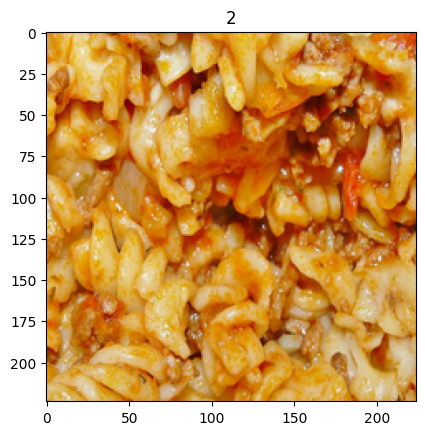

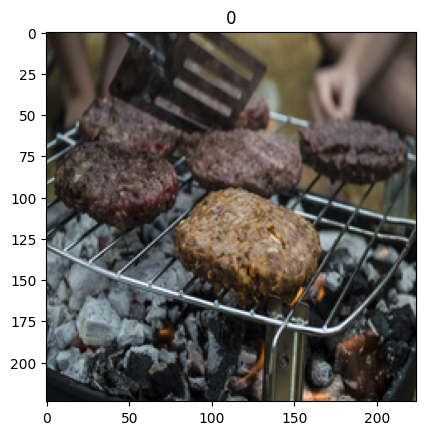

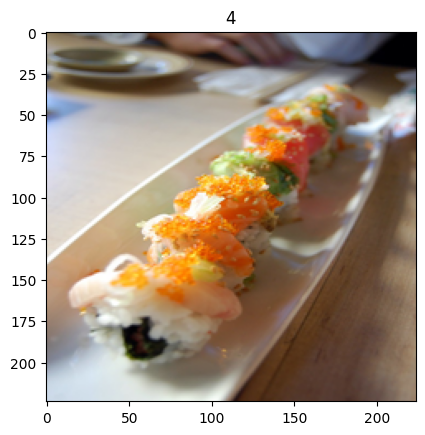

In [ ]:
zip_file_path = 'zipfile'
# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_folder')

# Define the paths for X and y
X = []
y = []

# Iterate through the extracted folder
for root, dirs, files in os.walk('/content/extracted_folder/images'):
    for folder_name in dirs:
        folder_path = os.path.join(root, folder_name)

        # Sort the list of files to ensure a consistent order
        #file_list = sorted(os.listdir(folder_path))

        # Iterate through sorted images in each folder
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)

            # Load the image and convert it to a numpy array if needed
            img = Image.open(image_path)
            img_array = np.array(img)
            X.append(img)
            y.append(folder_name)

# Convert y to numerical labels using LabelEncoder from sklearn
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Resizing all the images
resized_images = []
# Define the target size
width = 224
height = 224
target_size = (width, height)

# Resize each image to the target size using LANCZOS resampling
for img in X:
    resized_img = img.resize(target_size, Image.LANCZOS)
    resized_images.append(resized_img)
# Convert the list of resized images to a NumPy array
X_array = np.array([np.array(img) for img in resized_images])
plt.imshow(X_array[1000])
plt.title(y[1000])
plt.show()
plt.imshow(X_array[500])
plt.title(y[500])
plt.show()
plt.imshow(X_array[0])
plt.title(y[0])
plt.show()

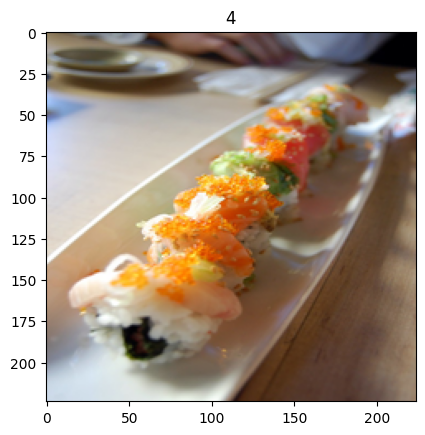

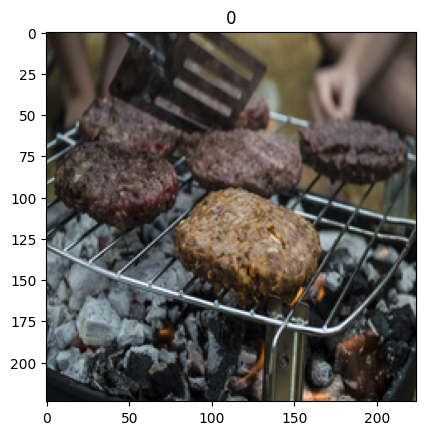

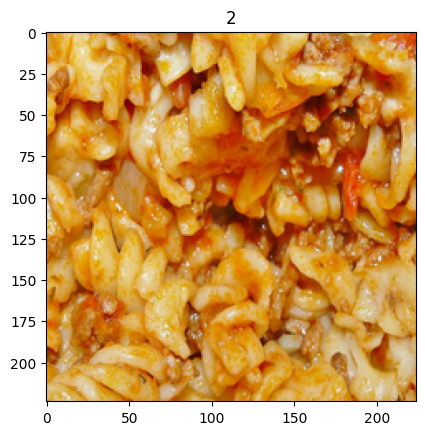

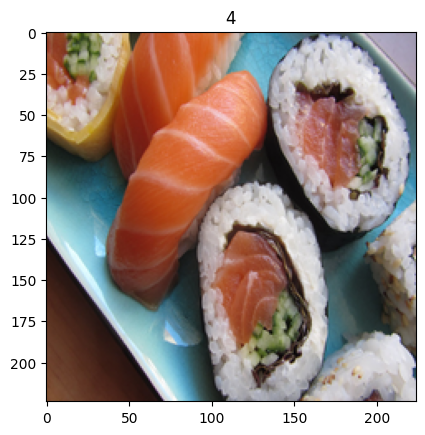

(1443,)


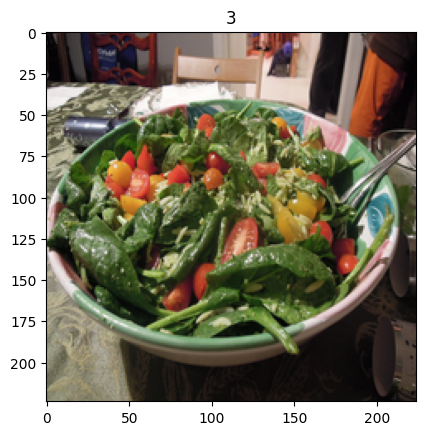

4 4 0 1 2 3


In [ ]:
plt.imshow(X_array[0])
plt.title(y[0])
plt.show()
plt.imshow(X_array[500])
plt.title(y[500])
plt.show()
plt.imshow(X_array[1000])
plt.title(y[1000])
plt.show()
plt.imshow(X_array[200])
plt.title(y[200])
plt.show()
print(y.shape)
plt.imshow(X_array[1400])
plt.title(y[1400])
plt.show()
print(y[0], y[200], y[500], y[800],y[1000],y[1300])

In [ ]:
SEED=33
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.1, shuffle=True, random_state=SEED)

Preprocess the feature vectors (normalize data)

In [ ]:
# Input data preprocessing
print(np.min(X_train), np.max(y_train))
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

#normalization
X_train /= 255
X_test /= 255

print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

0 4
1298 train samples
145 test samples


Preprocess the labels (one-hot encodings)

In [ ]:
# Labels preprocessing
min = np.min(y_train)
max = np.max(y_train)
print(min, max)
num_classes = max + 1

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("First label is now = ", y_train[0])

0 4
First label is now =  [1. 0. 0. 0. 0.]


## Validation data
Split training data into training and validation data, so that a full training-validation-test split is obtained, for maximizing the generalization performance.

In [ ]:
# Split training data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True,  random_state=SEED) # for reproducibility

##Build a Baseline model

In [ ]:
def CNNModel(num_classes):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
num_classes = 5
model = CNNModel(num_classes)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         495,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 501,477 (1.91 MB)

 Trainable params: 501,477 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

##Our Model

In [ ]:
class MyCNNModel(kt.HyperModel):
    def __init__(self, loss="categorical_crossentropy"):
        self.loss = loss

    def build(self, hp):
        model = self.build_CNN(hp)
        return model

    def build_CNN(self, hp):
        hp_units1 = hp.Int('unitsL1', min_value=16, max_value=256, step=16)
        hp_units2 = hp.Int('unitsL2', min_value=16, max_value=256, step=16)
        hp_activation = hp.Choice("activation", ["gelu", "relu"])
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        hp_dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
        hp_optimizer = hp.Choice('optimizer', values=['adam'])

        model = self.build_CNN_hp(
            hp_units1=hp_units1, hp_units2=hp_units2, hp_activation=hp_activation,
            hp_learning_rate=hp_learning_rate, hp_optimizer=hp_optimizer, hp_dropout_rate=hp_dropout_rate
        )
        return model

    def build_CNN_hp(self, hp_units1, hp_units2, hp_activation, hp_learning_rate,
                     hp_optimizer, hp_dropout_rate):
        model = Sequential()
        model.add(Conv2D(hp_units1, (3, 3), activation=hp_activation, input_shape=(50, 50, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(hp_units2, (3, 3), activation=hp_activation))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(hp_units1, activation=hp_activation))
        model.add(Dropout(hp_dropout_rate))
        model.add(Dense(hp_units2, activation=hp_activation))
        model.add(Dropout(hp_dropout_rate))
        model.add(Dense(5, activation="softmax"))

        optimizer = Adam(learning_rate=hp_learning_rate)
        loss = "categorical_crossentropy"

        model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
        return model

    def fit(self, hp, model, *args, **kwargs):
        datagen_train = ImageDataGenerator(
           rotation_range=10,
           width_shift_range=0.1,
            height_shift_range=0.1,
           shear_range=0.2,
           zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest'
        )


        datagen_train.fit(X_train)

        datagen_val = ImageDataGenerator(
          rotation_range=10,
          width_shift_range=0.1,
          height_shift_range=0.1,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          vertical_flip=True,
          fill_mode='nearest'
        )


        datagen_val.fit(X_val)

        return model.fit(
            datagen_train.flow(X_train, y_train, batch_size=128, shuffle=True),
            validation_data=datagen_val.flow(X_val, y_val, batch_size=128, shuffle=True)
        )


In [ ]:
# Define the hyperband tuner object, passing the model where to perform the search
tuner = kt.Hyperband(MyCNNModel(),
                     objective='val_accuracy',
                     max_epochs=20,

                     max_consecutive_failed_trials=5,
                     project_name='my_cnn_tuning',
                     directory='my_cnn_tuning',
)

# Summarize the search space
tuner.search_space_summary()


Search space summary
Default search space size: 6
unitsL1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': 'linear'}
unitsL2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': 'linear'}
activation (Choice)
{'default': 'gelu', 'conditions': [], 'values': ['gelu', 'relu'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam'], 'ordered': False}


# Training


## Baseline's training

Here we train the baseline model using the same parameters specified in the lab.

In [ ]:
batch_size = 128
epochs = 5


In [ ]:
# Fit the model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val))
plot_history(history)

Save the baseline model in the workspace

In [ ]:
model.save('/content/baseline_model.keras')

In [ ]:
print("Original shape of X_train:", X_train.shape)


## Training the best model


In [ ]:
# Early stop to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(
  monitor="val_loss",
  min_delta=0,
  patience=10,
  verbose=0,
  mode="auto",
  baseline=None,
  restore_best_weights=True,
  start_from_epoch=5,
)

# Perform the search
tuner.search(X_train, y_train, validation_data=(X_val, y_val), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for maximum 50 epochs
best_model = tuner.hypermodel.build(best_hps)

#train the model with the whole data set
#we should eliminate the validation state since it is not useful anymore
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[stop_early])

# Plot the training summary
plot_history(history)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = np.argmax(val_acc_per_epoch) + 1
print('Best epoch: %d' % (best_epoch,))

Save the best model in the workspace

In [ ]:
best_model.save('/content/best_model.keras')

#Evaluation


## Baseline evaluation

Print the loss and accuracy of the trained baseline model.

In [ ]:
base_score = model.evaluate(X_test, y_test, verbose=0)

print("Baseline model")
print("Test loss:", base_score[0])
print("Test accuracy:", base_score[1])

## Best model evaluation
Print the best hyperparameters found by the hyperband tuner.

Print the loss and accuracy of the best model.

Print the accuracy increment in the test set.

The test set is not subject to augmentation as it should not be manipulated, but only be used as references for evaluation.

In [ ]:
best_score = best_model.evaluate(X_test, y_test, verbose=0)

# Evaluate and print results
best_score = best_model.evaluate(X_test, y_test, verbose=0)
print("Best model")
print("Best parameters:", best_hps.values)
print("Test loss:", best_score[0])
print("Test accuracy:", best_score[1])
print("Test accuracy improvement:", 100*(best_score[1]-base_score[1])/base_score[1], "%")

-##Pretrained network

In [ ]:
# Define input shape for the model (224x224 is common for ResNet)
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
#modify the dimensions of the images to adapt to the input of the neural network

#pretrained network ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


for layer in base_model.layers:
  layer.trainable=False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
# Add a Dense layer with number of units matching your number of classes
x = Dense(units=5, activation='softmax')(x)


# Create the final model
model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
  layer.trainable=layer.name.startswith('conv5')

model.summary()
dnn_model=model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,703,109 (94.23 MB)

 Trainable params: 14,976,000 (57.13 MB)

 Non-trainable params: 9,727,109 (37.11 MB)

In [ ]:
# Early stop to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(
  monitor="val_loss",
  min_delta=0,
  patience=10,
  verbose=0,
  mode="auto",
  baseline=None,
  restore_best_weights=True,
  start_from_epoch=5,
)


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(X_train, y_train, batch_size=128, shuffle=True)

validation_generator = val_datagen.flow(X_val, y_val, batch_size=128, shuffle=True)


dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Adjust epochs and steps_per_epoch based on your dataset size
history = dnn_model.fit(train_generator, epochs=40, validation_data=validation_generator, callbacks=[stop_early])
#, callbacks=[stop_early]




Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 440s 50s/step - accuracy: 0.2144 - loss: 1.7629 - val_accuracy: 0.2269 - val_loss: 2.3888
Epoch 2/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 399s 43s/step - accuracy: 0.2082 - loss: 1.6396 - val_accuracy: 0.1731 - val_loss: 2.8307
Epoch 3/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 433s 48s/step - accuracy: 0.2083 - loss: 1.6482 - val_accuracy: 0.2077 - val_loss: 3.3358
Epoch 4/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 404s 44s/step - accuracy: 0.2156 - loss: 1.6478 - val_accuracy: 0.1731 - val_loss: 3.9119
Epoch 5/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 399s 43s/step - accuracy: 0.2053 - loss: 1.6365 - val_accuracy: 0.1731 - val_loss: 2.5026
Epoch 6/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 448s 44s/step - accuracy: 0.1948 - loss: 1.6356 - val_accuracy: 0.1731 - val_loss: 1.9715
Epoch 7/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 446s 45s/step - accuracy: 0.1827 - loss: 1.6236 - val_accuracy: 0.1731 - val_loss: 2.2387
Epoch 8/40
9/9 ━━━━━━━━━━━━━━━━━━━━ 411s 41s/step - accuracy: 0.1943 - loss: 1.6172 - val_accuracy: 0.1731 - val_loss: 1.9581
Epo

In [ ]:
# Plot the training summary
plot_history(history)

##Pretrained Model evaluation

We define a function to compute class-wise accuracies given a model and the testing data.

In [ ]:
def compute_class_accuracies(X_data, y_data, model):
  # The predicted probabilities for each class
  y_pred_probs = model.predict(X_data)

  # The corresponding predicted labels
  y_pred_labels = np.argmax(y_pred_probs, axis=1)

  # The corresponding true labels
  y_true_labels = np.argmax(y_data, axis=1)

  # Compute confusion matrix
  cm = confusion_matrix(y_true_labels, y_pred_labels)

  # Compute accuracies and weights for each class
  class_accuracies = []
  for class_label in range(len(cm)):
      class_accuracy = cm[class_label, class_label] / np.sum(cm[class_label, :])
      class_accuracies.append(class_accuracy)

  # Print the classification report
  print(classification_report(y_true_labels, y_pred_labels))

  return class_accuracies


Here we compute the class accuracies and F1.

In [ ]:
# Compute class-wise accuracies of the best_model
class_accuracies = compute_class_accuracies(X_test, y_test, dnn_model)

# Print class labels along with their accuracies
for class_label, accuracy in enumerate(class_accuracies):
    print(f"Class {class_label}: Accuracy {accuracy:.2f}")

# Print the classification report
print(classification_report(y_true_labels, y_pred_labels))


5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.76      0.97      0.85        36
           2       0.60      0.88      0.71        17
           3       1.00      0.29      0.44        35
           4       0.70      1.00      0.82        23

    accuracy                           0.77       145
   macro avg       0.79      0.79      0.74       145
weighted avg       0.82      0.77      0.74       145

Class 0: Accuracy 0.82
Class 1: Accuracy 0.97
Class 2: Accuracy 0.88
Class 3: Accuracy 0.29
Class 4: Accuracy 1.00


NameError: name 'y_true_labels' is not defined

In [ ]:
best_score = dnn_model.evaluate(X_test, y_test, verbose=0)

# Evaluate and print results
best_score = dnn_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", best_score[0])
print("Test accuracy:", best_score[1])
print("Test accuracy improvement:", 100*(best_score[1]-base_score[1])/base_score[1], "%")

Test loss: 1.6322078704833984
Test accuracy: 0.7655172348022461


NameError: name 'base_score' is not defined

#Transformation test

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Shape of X_augmented: (145, 224, 224, 3)
Shape of y_augmented: (145, 5)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


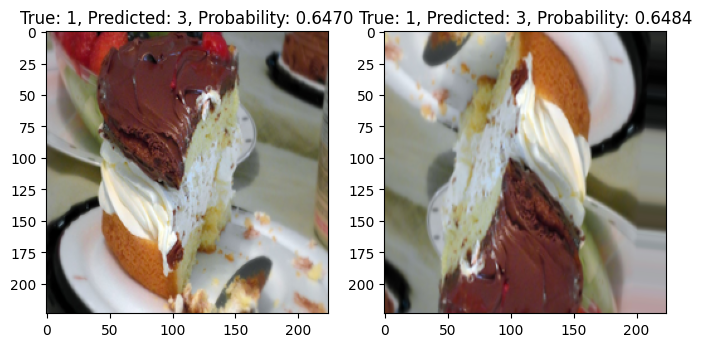

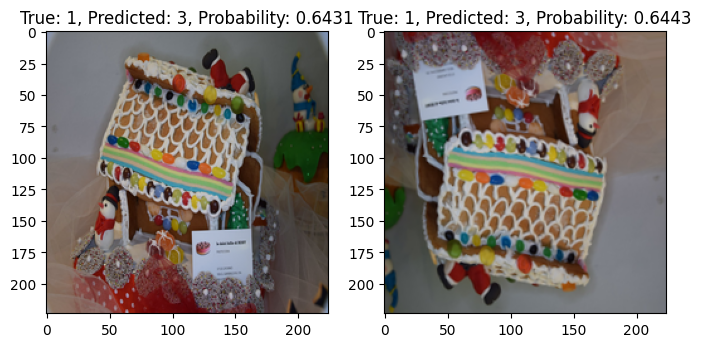

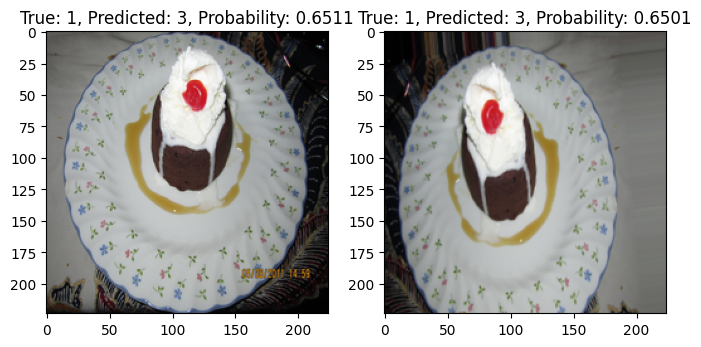

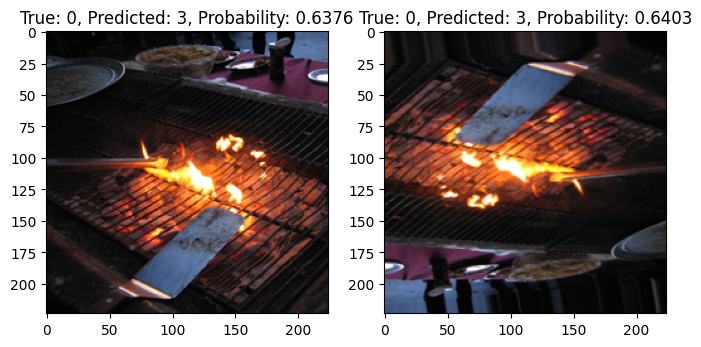

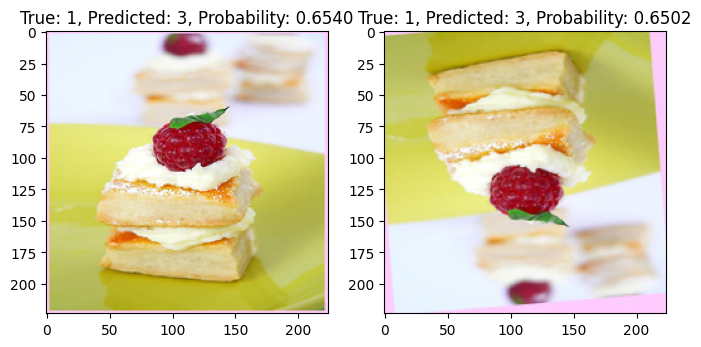

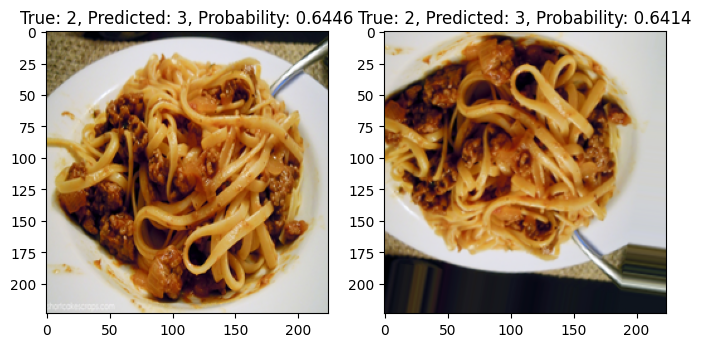

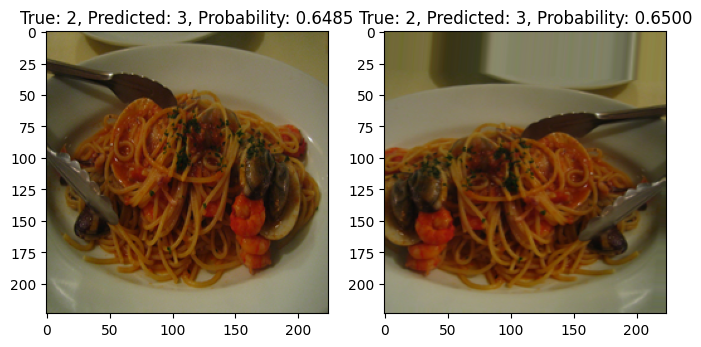

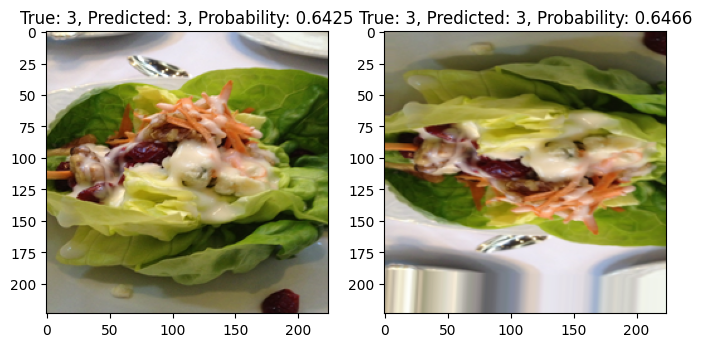

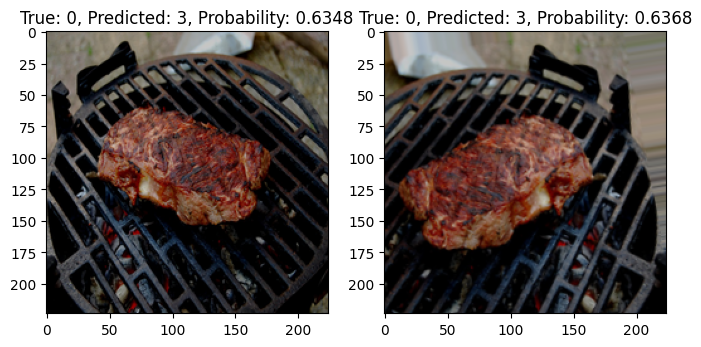

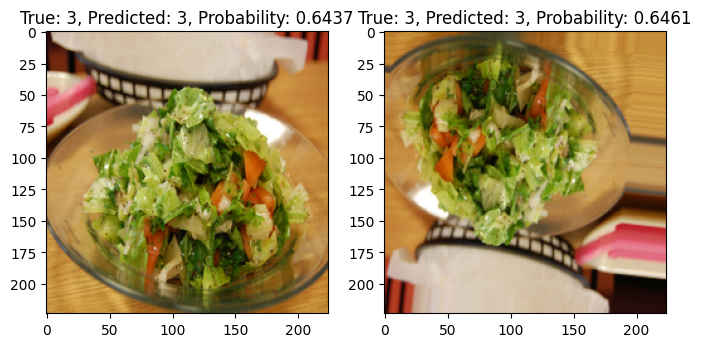

In [ ]:
# Create the same ImageDataGenerator for augmentation as in the definition of our model
datagen = ImageDataGenerator(
  rotation_range=10,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip = True,
  fill_mode='nearest',
  validation_split=0.2
)

# Lists to store augmented data
X_augmented = []
y_augmented = []

# The predicted probabilities for each class
y_pred_probs = model.predict(X_test)
# The corresponding predicted labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Iterate through all training examples
for i in range(len(X_test)):
    # Reshape the image to (1, height, width, channels) for flow method
    img = X_test[i].reshape((1,) + X_test[i].shape)

    # Generate augmented images and store in X_augmented and y_augmented
    for batch, labels_batch in datagen.flow(img, y_test[i].reshape(1, -1), batch_size=1):
        X_augmented.append(batch[0].reshape(X_test[i].shape))
        y_augmented.append(labels_batch[0])
        break  # Exit the loop after one augmented image

# Convert lists to NumPy arrays
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

# Check the shape of augmented data
print("Shape of X_augmented:", X_augmented.shape)
print("Shape of y_augmented:", y_augmented.shape)

# The predicted probabilities for each class
y_pred_probs_aug = model.predict(X_augmented)
# The corresponding predicted labels
y_pred_labels_aug = np.argmax(y_pred_probs_aug, axis=1)

# Display the first 10 examples
for i in range(10):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(X_test[i].reshape(X_test[i].shape), cmap="gray")
    plt.title(f'True: {np.argmax(y_test[i])}, Predicted: {y_pred_labels[i]}, Probability: {y_pred_probs[i, y_pred_labels[i]]:.4f}')

    plt.subplot(1, 2, 2)
    plt.imshow(X_augmented[i].reshape(X_augmented[i].shape), cmap="gray")
    plt.title(f'True: {np.argmax(y_augmented[i])}, Predicted: {y_pred_labels_aug[i]}, Probability: {y_pred_probs_aug[i, y_pred_labels_aug[i]]:.4f}')

    plt.show()


##Explainable AI

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)


